In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import seaborn as sns


In [2]:
# Paths to the pre-split datasets 
train_dir = "C:/Swetha/ASEB/Infosys_internship/brain_tumor_dataset/Training"
test_dir = "C:/Swetha/ASEB/Infosys_internship/brain_tumor_dataset/Testing"

In [3]:
# Image dimensions
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32


In [5]:
# Data augmentation and preprocessing
datagen_train = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, zoom_range=0.15,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                                   horizontal_flip=True, fill_mode="nearest")

datagen_test = ImageDataGenerator(rescale=1.0/255.0)

train_data = datagen_train.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = datagen_test.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [6]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

c:\Swetha\ASEB\Infosys_internship\infosys_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
EPOCHS = 5
history = model.fit(
    train_data,
    epochs=EPOCHS
)

# Saving the model
model.save('brain_tumor_cnn_model.h5')


c:\Swetha\ASEB\Infosys_internship\infosys_venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 157s 857ms/step - accuracy: 0.4320 - loss: 1.2211
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 517ms/step - accuracy: 0.6251 - loss: 0.8978
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 455ms/step - accuracy: 0.6915 - loss: 0.7737
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 102s 566ms/step - accuracy: 0.7289 - loss: 0.7095
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 110s 614ms/step - accuracy: 0.7324 - loss: 0.6673


In [10]:
# Evaluating the model
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.6087 - loss: 1.1765
Test Loss: 1.1632705926895142
Test Accuracy: 0.6071701049804688


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step
Confusion Matrix:
 [[ 29  49 181  41]
 [ 35  50 177  44]
 [ 51  61 242  51]
 [ 32  63 173  32]]


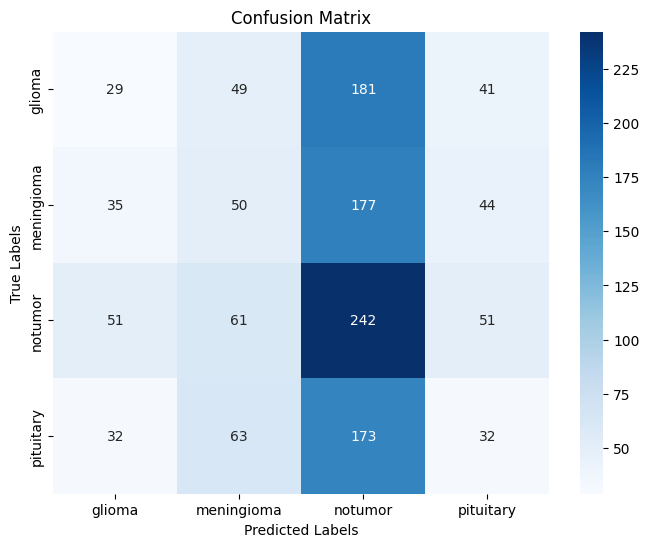

Classification Report:
               precision    recall  f1-score   support

      glioma       0.20      0.10      0.13       300
  meningioma       0.22      0.16      0.19       306
     notumor       0.31      0.60      0.41       405
   pituitary       0.19      0.11      0.14       300

    accuracy                           0.27      1311
   macro avg       0.23      0.24      0.22      1311
weighted avg       0.24      0.27      0.23      1311



In [14]:
# Confusion matrix and classification report
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=-1)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_labels = list(test_data.class_indices.keys())
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted class: notumor


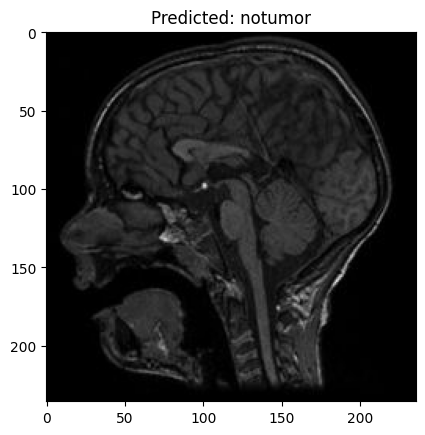

In [ ]:
def test_single_image(image_path):
    image = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class = class_labels[np.argmax(prediction)]
    print(f"Predicted class: {predicted_class}")
    plt.imshow(load_img(image_path))
    plt.title(f"Predicted: {predicted_class}")
    plt.show()


#Testing by giving a random image
test_image_path = 'C:/Swetha/ASEB/Infosys_internship/brain_tumor_dataset/Testing/notumor/Te-no_0038.jpg'  
test_single_image(test_image_path)